# Outil de génération des graphiques 

Ce programme utilise le fichier .CSV généré par un sondage Moodle pour consituer des graphiques.

Output()

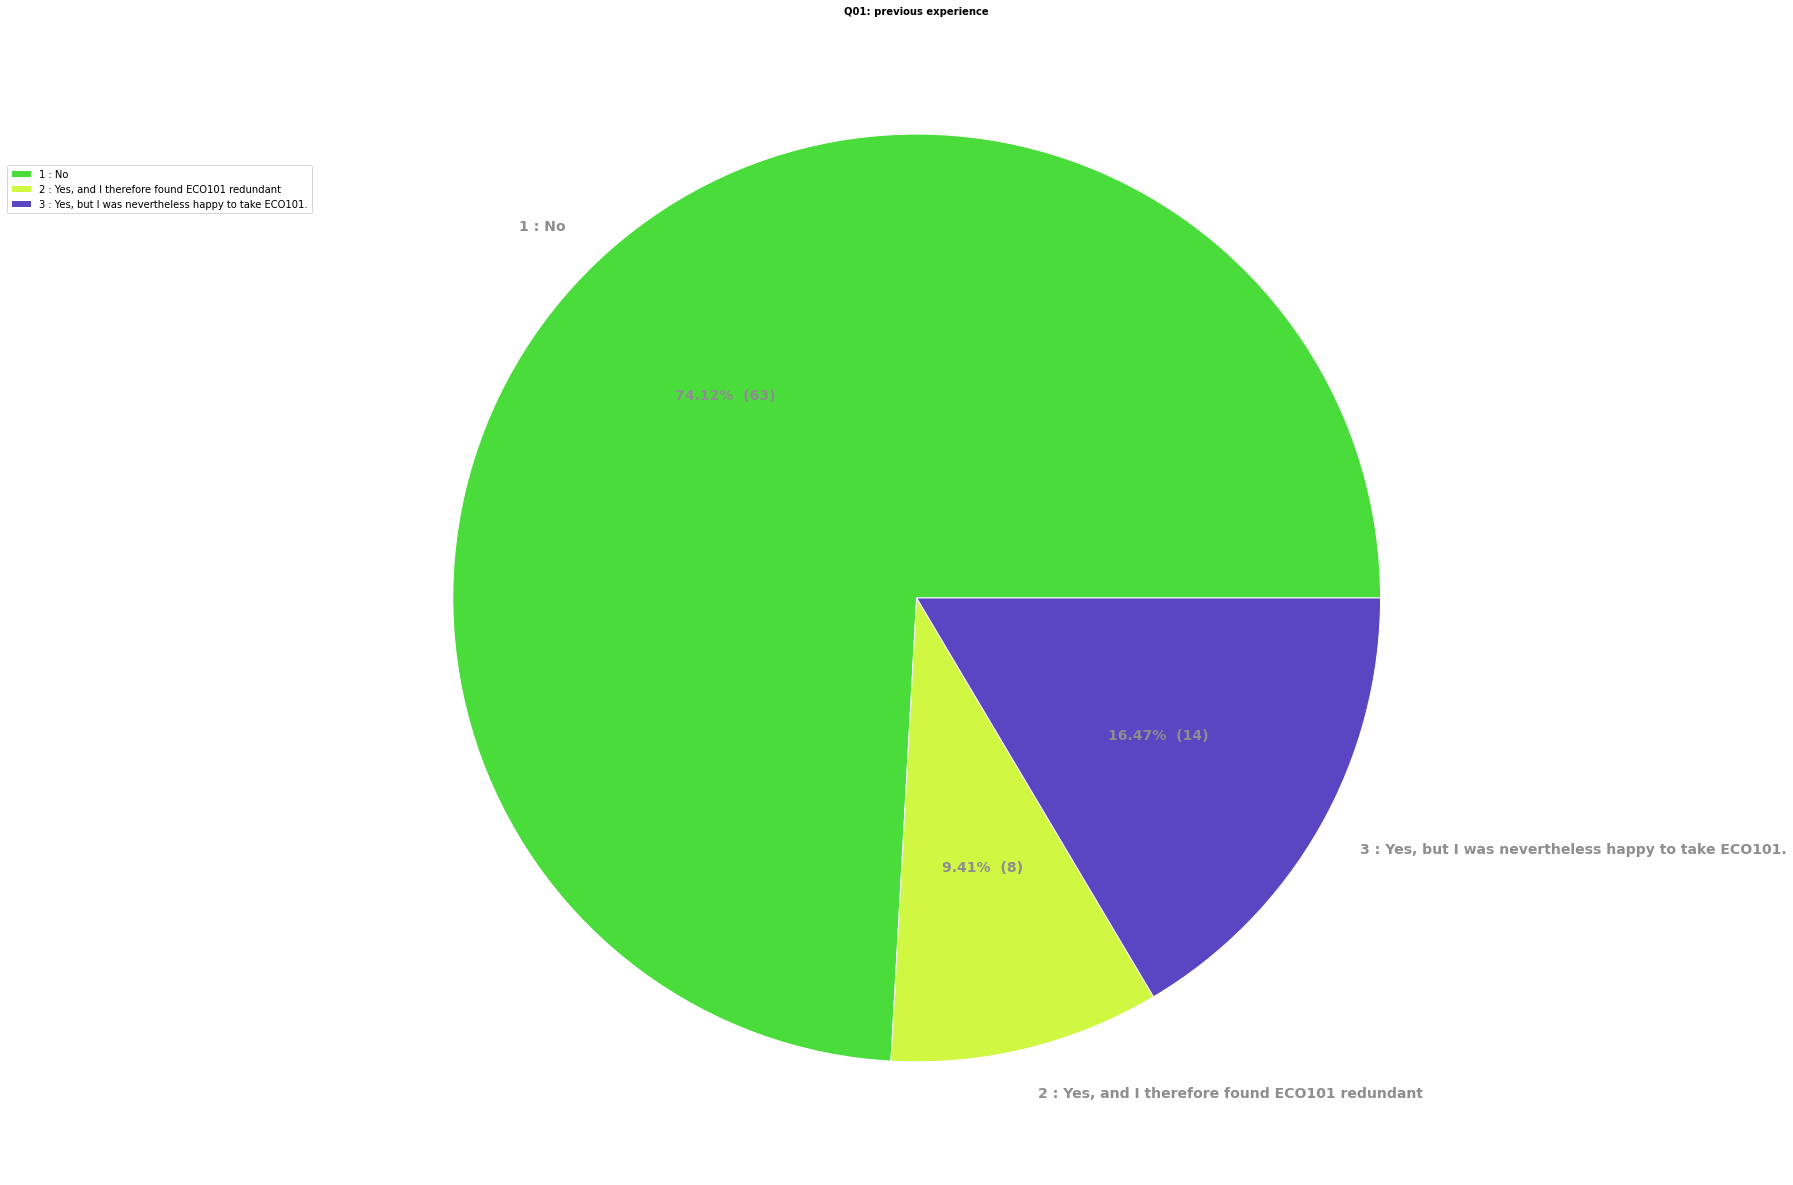

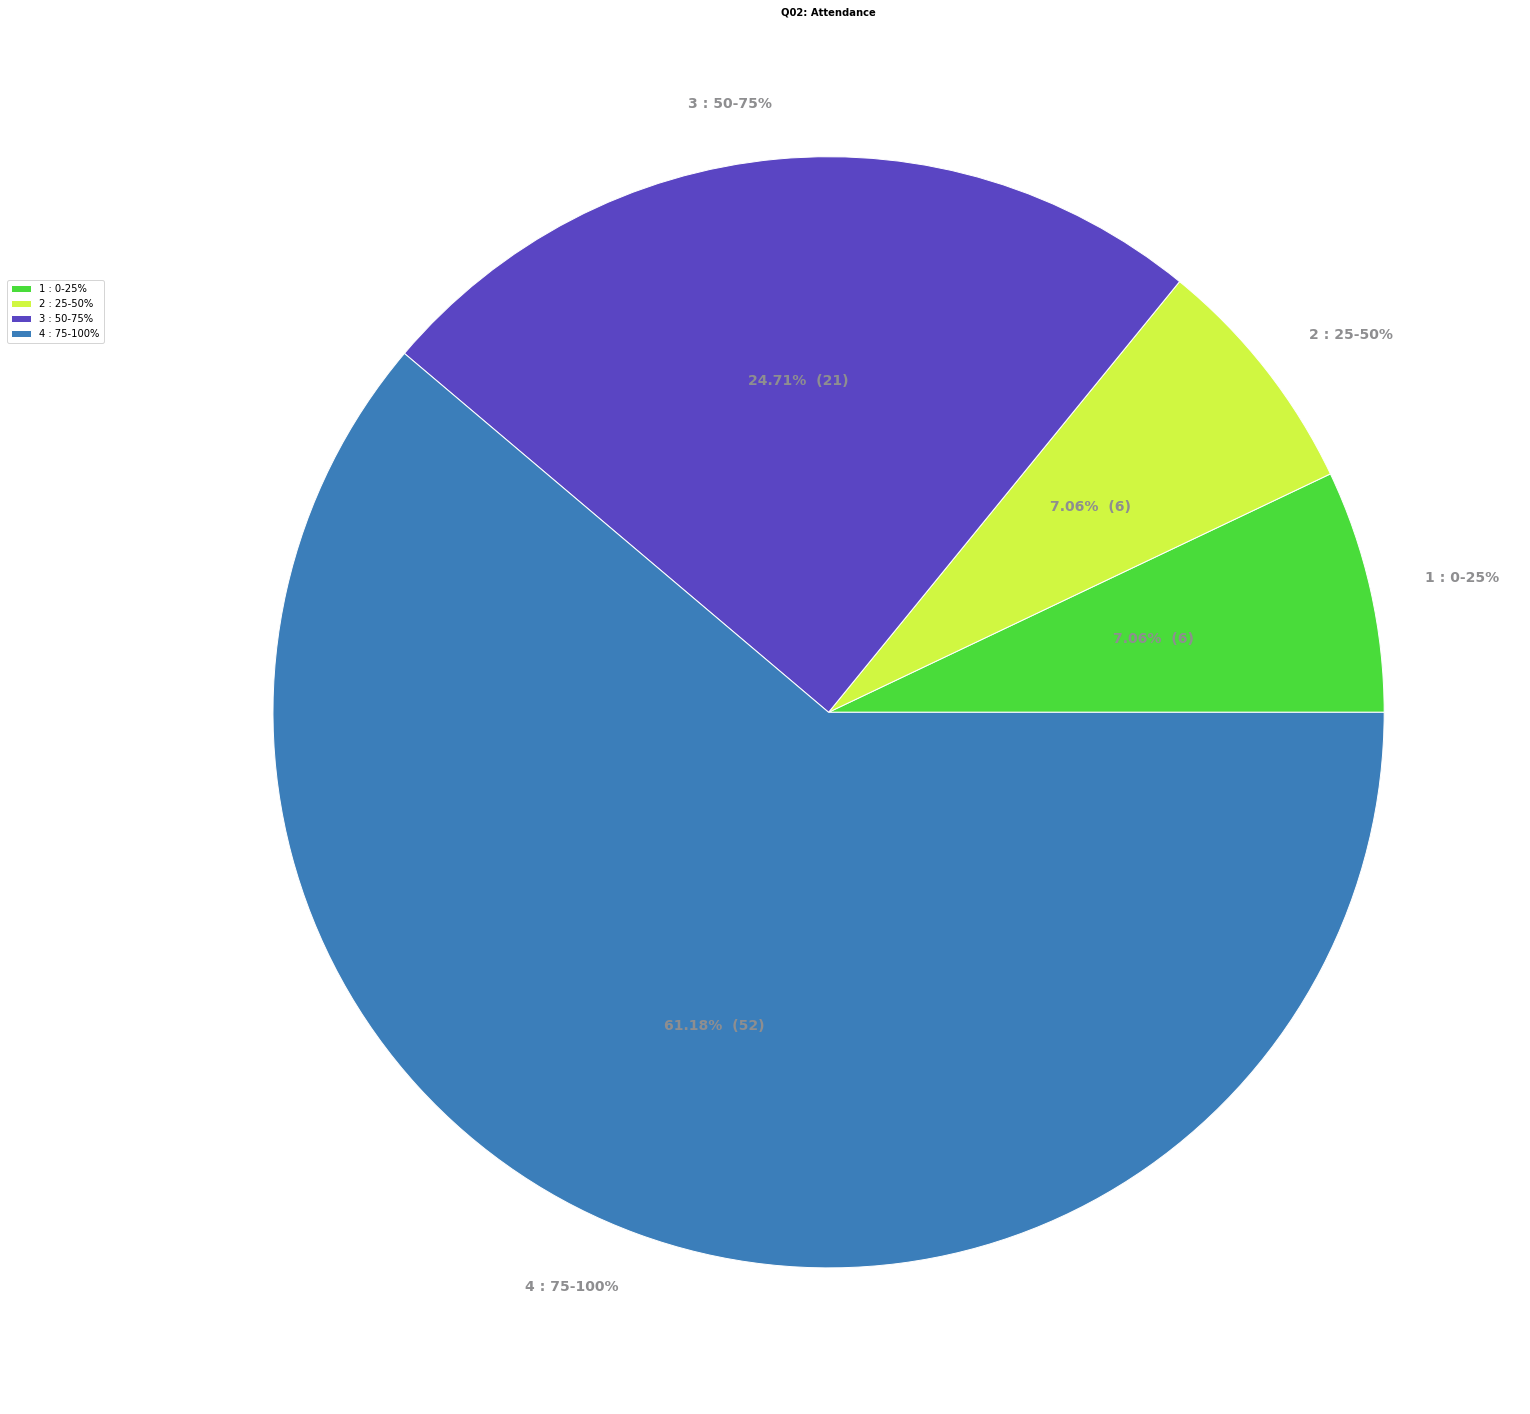

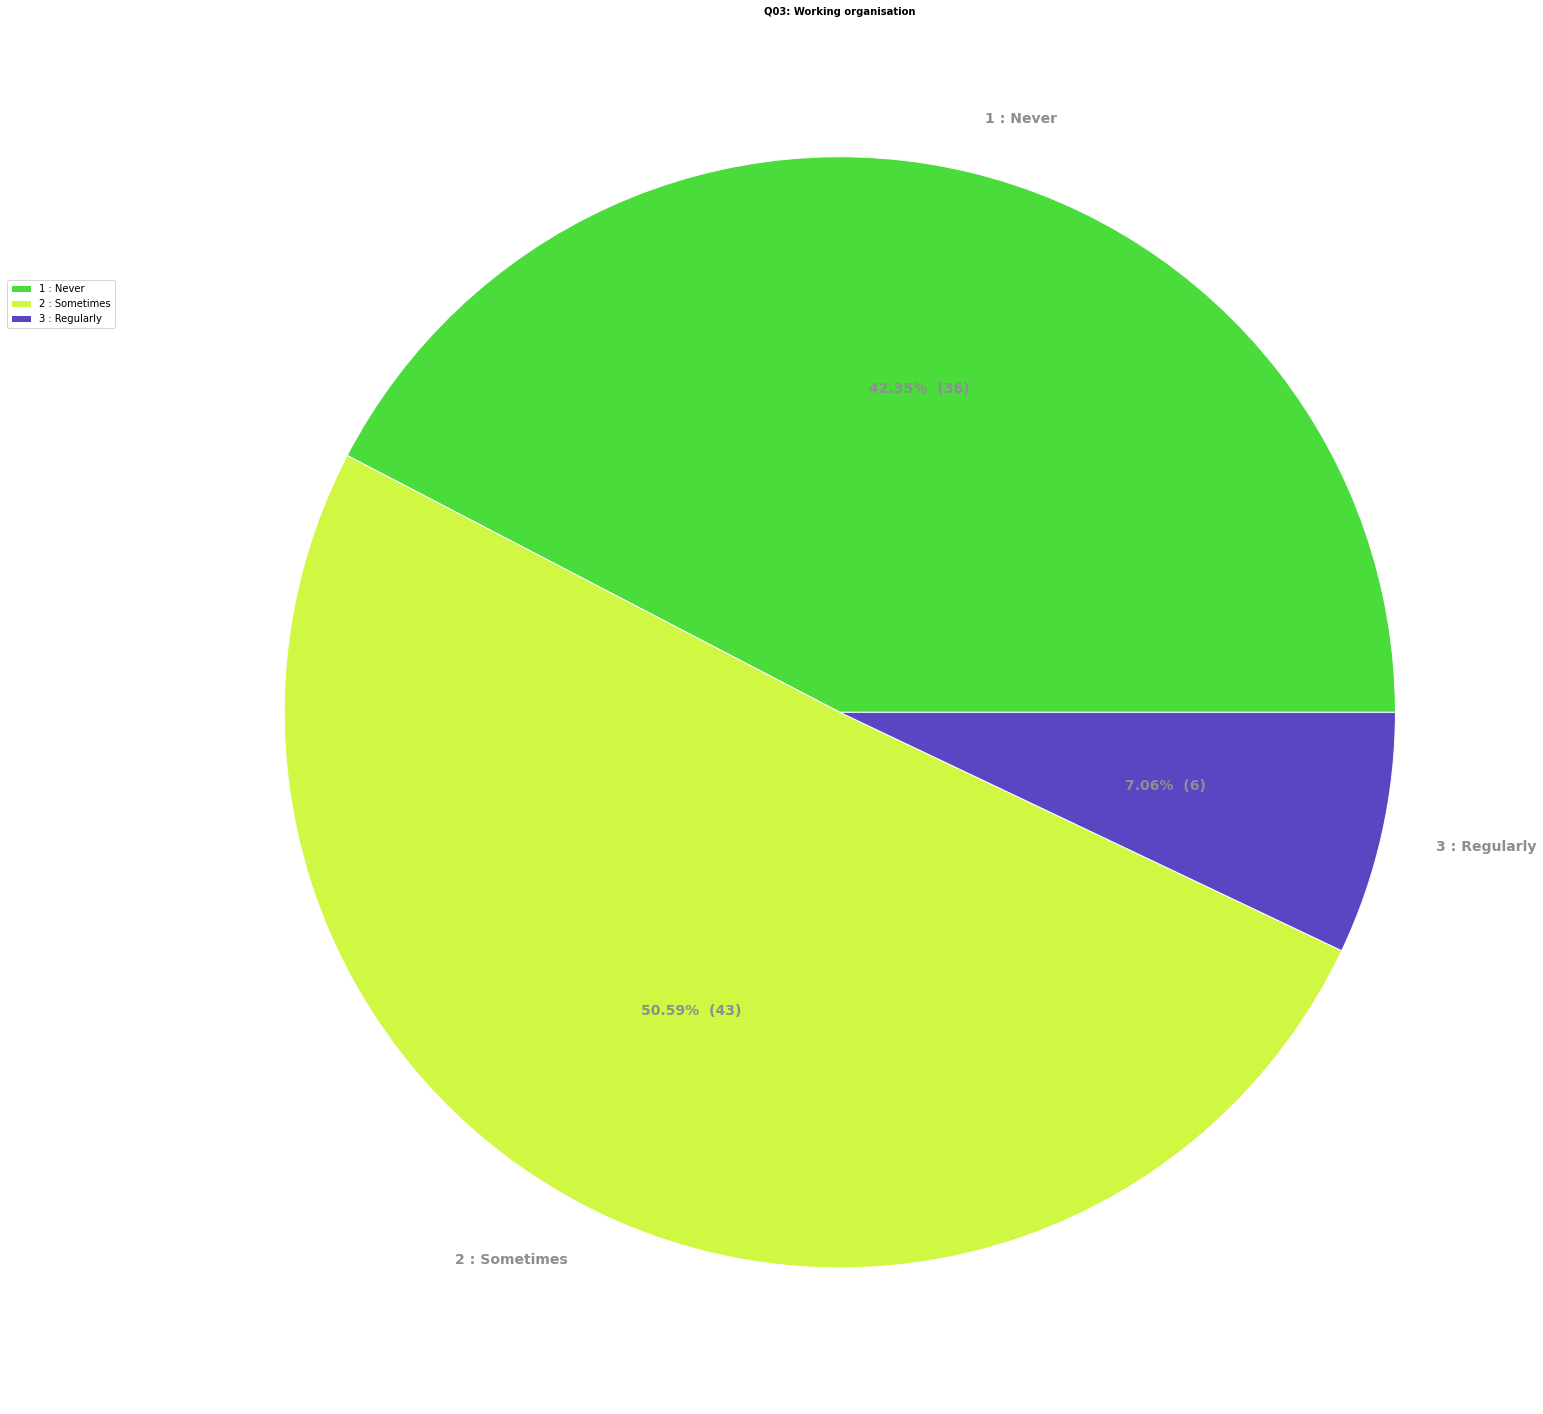

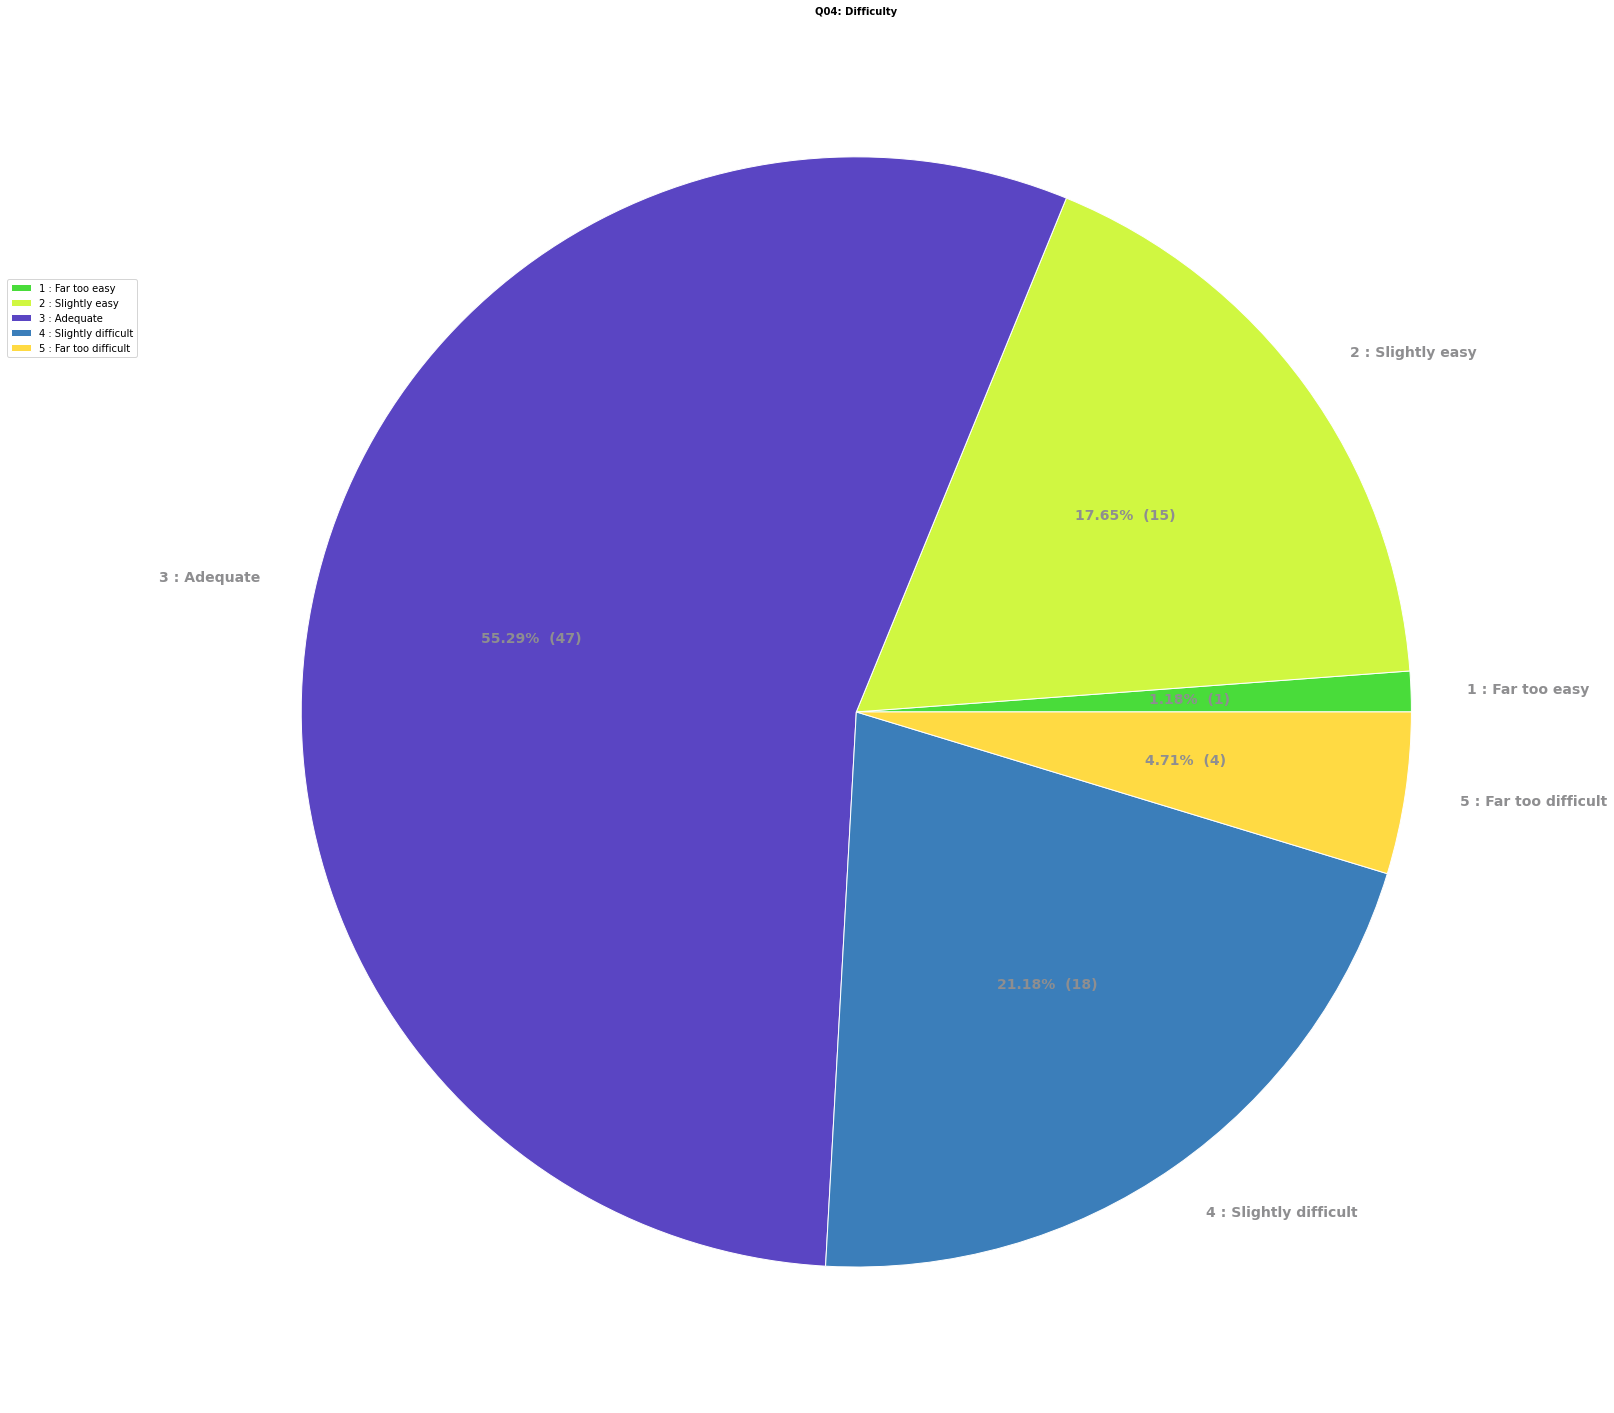

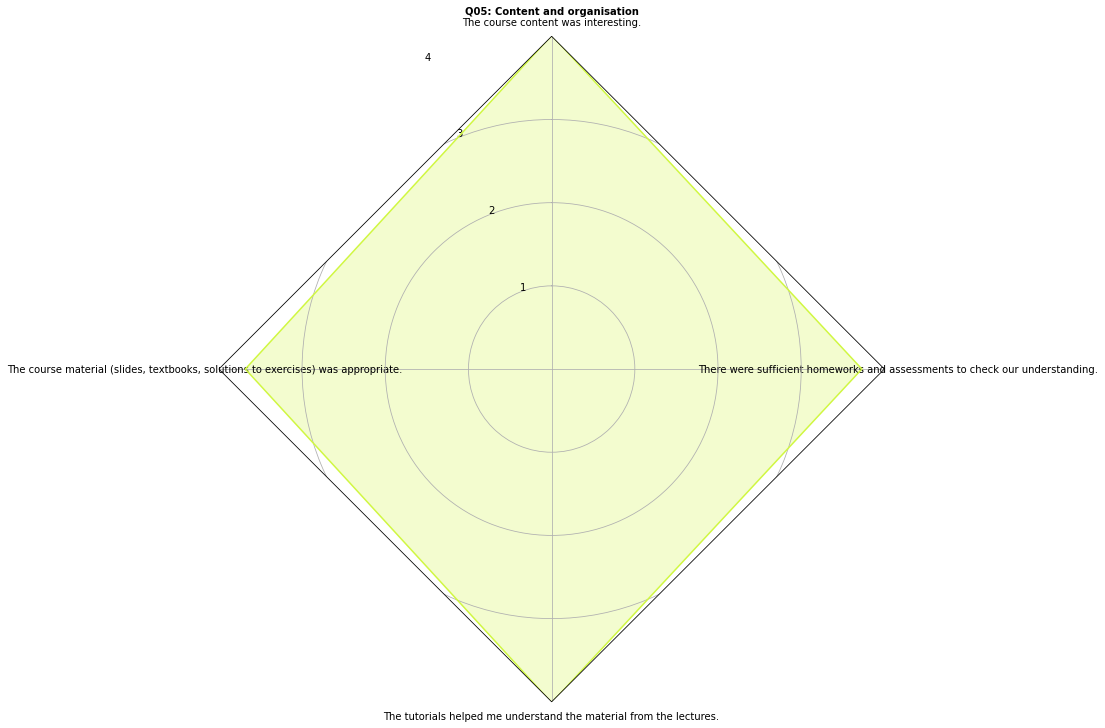

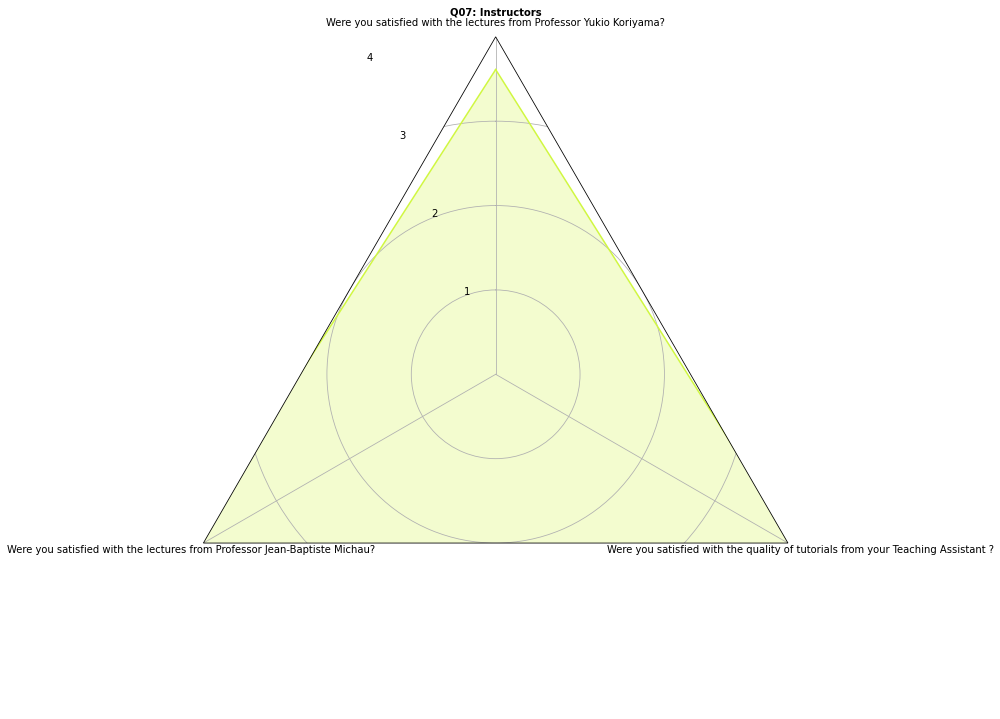

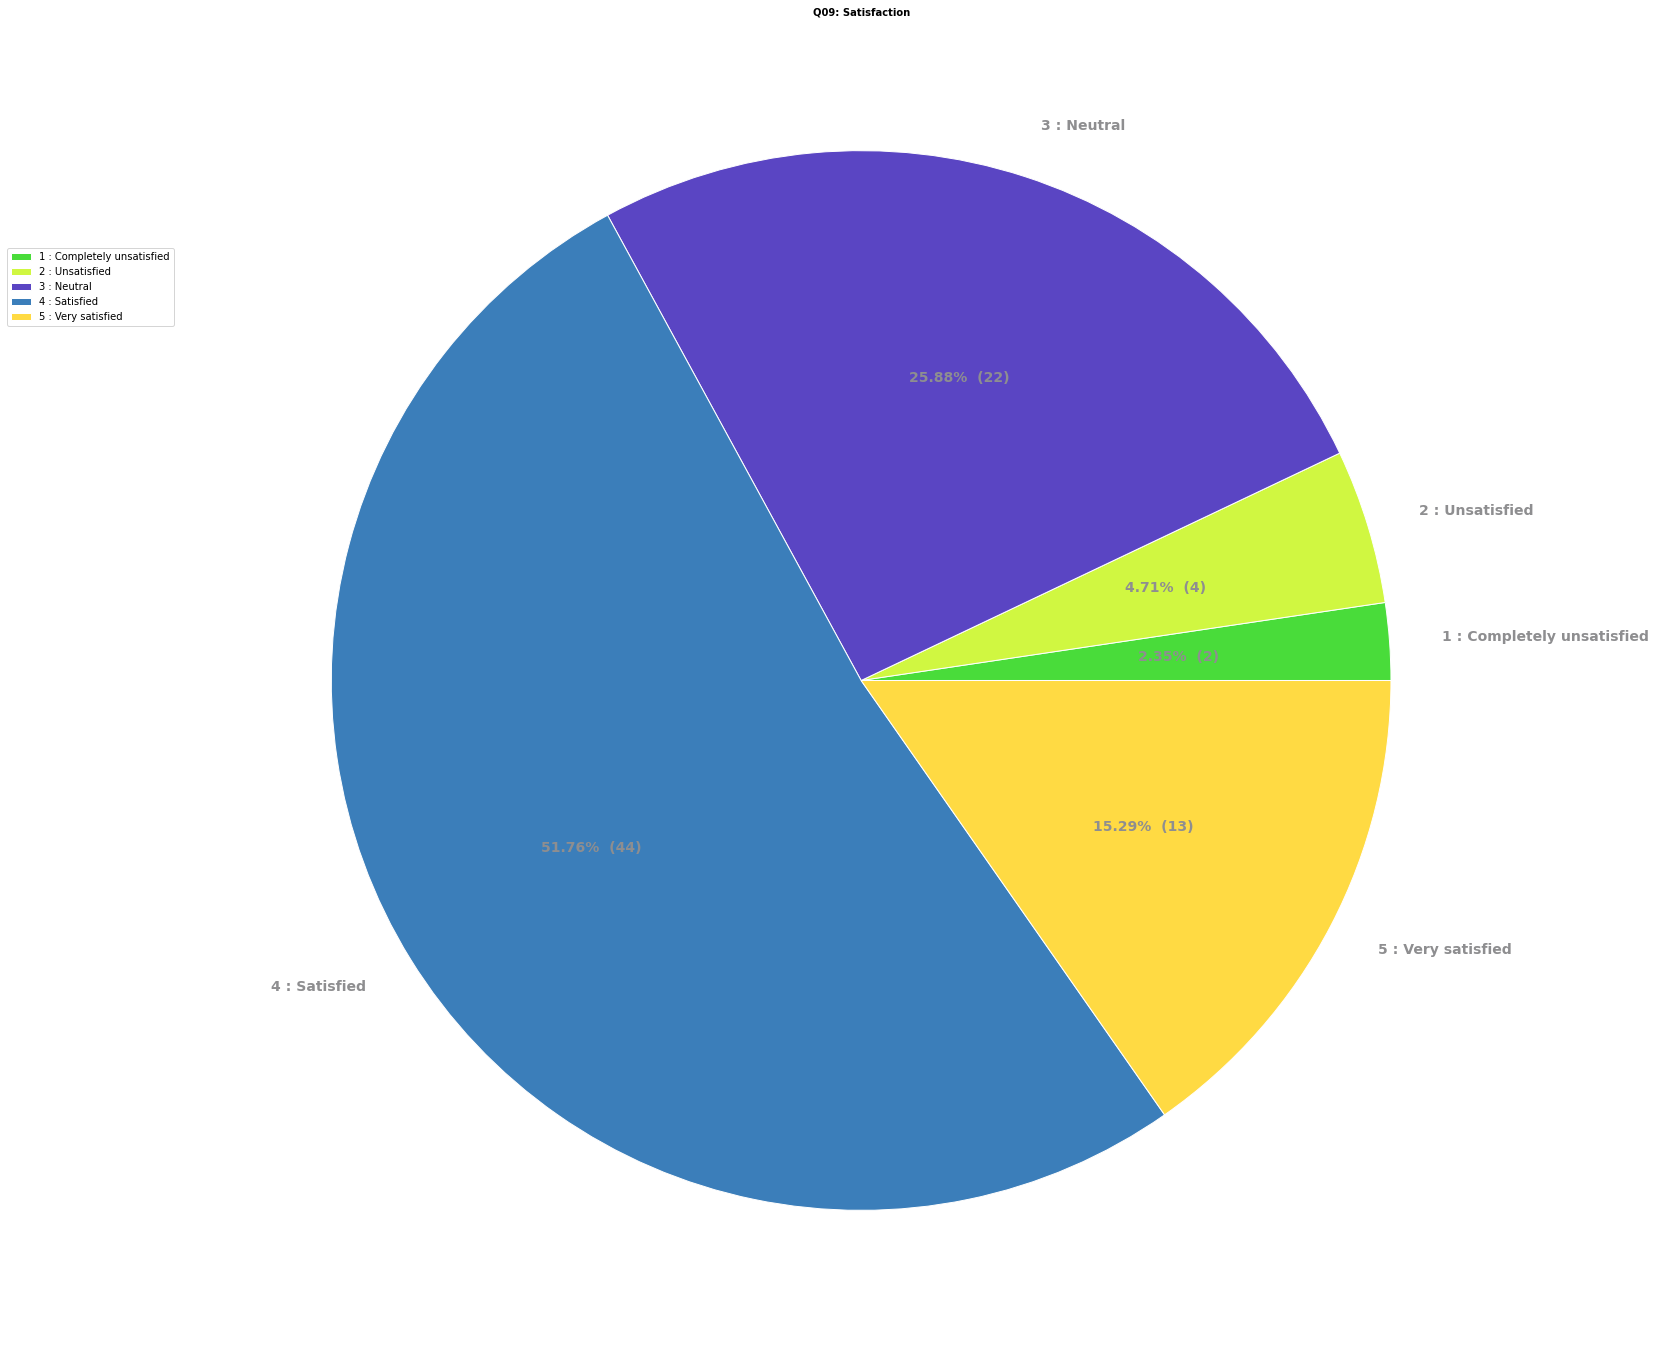

In [1]:
import tlc
import ipywidgets as ipw
from ipywidgets import Button
from IPython.display import HTML
from IPython.display import display
from IPython.display import FileLink

from base64 import b64encode

def on_upload_clicked(change):
    global pdf_file
    uploader.disabled = True
    pdf_file = tlc.generate_charts(change)
    btn.description = f"Download {pdf_file}"
    with out:
        display(FileLink(pdf_file, result_html_prefix="Click here to download: "))
        display(btn)
    uploader.disabled = False

def download_data(e=None):
    #ici lire le fichier pdf à envoyer en premier parametre
    with open(pdf_file, 'rb') as f:
        data = b64encode(f.read())
    trigger_download(data, pdf_file, kind='application/pdf')

def trigger_download(data, filename, kind='text/json'):
    # see https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/Data_URIs for details
    #content_b64 = b64encode(data.encode()).decode()
    data_url = f'data:{kind};charset=utf-8;base64,{data}'
    js_code = f"""
        var a = document.createElement('a');
        a.setAttribute('download', '{filename}');
        a.setAttribute('href', '{data_url}');
        a.innerHTML = 'Télécharger le fichier PDF';
        a.click();
    """
    with out:
        display(HTML(f'<script>{js_code}</script>'))
 

pdf_file = ''

uploader = ipw.FileUpload(
    accept='*.csv',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False,  # True to accept multiple files upload else False
    description='Moodle (.csv)',
    layout=ipw.Layout(width="200px")
)

uploader.observe(on_upload_clicked, names='value')

display(ipw.HBox([uploader])) 
out = ipw.Output()
btn = Button(description=f'Download {pdf_file}', layout=ipw.Layout(width="600px"))
btn.on_click(download_data)
display(out)